<a href="https://colab.research.google.com/github/ritimishra1706/Internship-Projects/blob/main/Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler


import warnings
warnings.filterwarnings('ignore')

loading the dataset

In [ ]:
df=pd.read_csv("Major_project_data (1).csv")

In [ ]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

Categorizing columns which have binary classes

In [ ]:
columns=df.columns
binary_val=[]
for i in columns:
  if df[i].value_counts().shape[0]==2:
    binary_val.append(i)


In [ ]:
#categorical data with binary classes
binary_val

['gender', 'multi_screen', 'mail_subscribed', 'churn']

In [ ]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


Finding relationship or affect of the columns(features) on the target column 'churn'

In [ ]:
df[['year','churn']].groupby(['year']).mean()

,churn
year,
2015,0.133333


In [ ]:
df[['gender','churn']].groupby(['gender']).mean()

,churn
gender,
Female,0.138614
Male,0.129845


In [ ]:
df[['gender','churn']]

,gender,churn
0,Female,0.0
1,Female,0.0
2,Female,1.0
3,Female,0.0
4,Female,0.0
...,...,...
1995,Female,NaN
1996,Male,0.0
1997,NaN,0.0
1998,Male,0.0


In [ ]:
df['gender'].value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [ ]:
df['churn'].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [ ]:
df[['mail_subscribed','churn']].groupby(['mail_subscribed']).mean()

,churn
mail_subscribed,
no,0.150285
yes,0.090909


In [ ]:
df[['gender','churn']].groupby(['gender']).mean()


,churn
gender,
Female,0.138614
Male,0.129845


In [ ]:
df[['multi_screen','churn']].groupby(['multi_screen']).mean()

,churn
multi_screen,
no,0.104014
yes,0.397959


Percentage of churn with having values yes or no

In [ ]:
100*df['churn'].value_counts()/len(df['churn'])

0.0    85.15
1.0    13.10
Name: churn, dtype: float64

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [ ]:
df[['multi_screen','churn']].groupby(['multi_screen']).mean()

,churn
multi_screen,
no,0.104014
yes,0.397959


In [ ]:
df[['weekly_mins_watched','churn']].groupby(['weekly_mins_watched']).mean()

,churn
weekly_mins_watched,
0.00,0.5
11.85,0.0
18.75,0.0
29.25,0.0
38.85,0.0
...,...
501.45,1.0
503.25,1.0
506.10,1.0


In [ ]:
df[['maximum_days_inactive','churn']].groupby(['maximum_days_inactive']).mean()

,churn
maximum_days_inactive,
0.0,0.000000
1.0,0.083333
2.0,0.107807
3.0,0.127820
4.0,0.146688
5.0,0.146341
6.0,0.500000


Check age affect on the target variable

In [ ]:
df[['age','churn']].groupby(['age']).mean()

,churn
age,
18,0.333333
19,0.500000
20,0.166667
21,0.153846
22,0.222222
...,...
76,0.000000
77,1.000000
79,0.000000


In [ ]:
df[['no_of_days_subscribed','churn']].groupby(['no_of_days_subscribed']).mean()

,churn
no_of_days_subscribed,
1,0.0
2,1.0
3,0.0
5,0.0
6,0.0
...,...
217,0.0
224,0.5
225,0.5


# Drop Unwanted Columns

In [ ]:
df=df.drop(['year','customer_id','phone_no'],axis=1)

In [ ]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


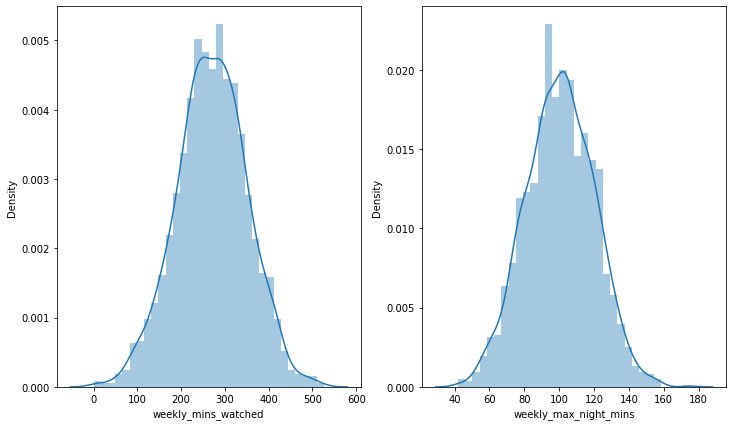

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["weekly_mins_watched"], ax=axes[0])
sns.distplot(df["weekly_max_night_mins"], ax=axes[1])

In [ ]:
df[['weekly_max_night_mins','no_of_days_subscribed','churn']].groupby('churn').mean()

,weekly_max_night_mins,no_of_days_subscribed
churn,,
0.0,100.406342,99.711098
1.0,100.763359,100.007634


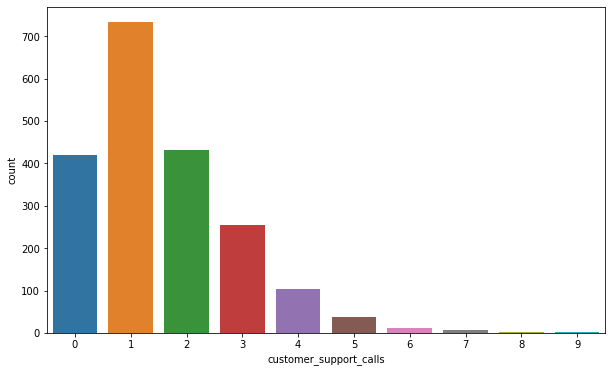

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot("customer_support_calls",data=df)

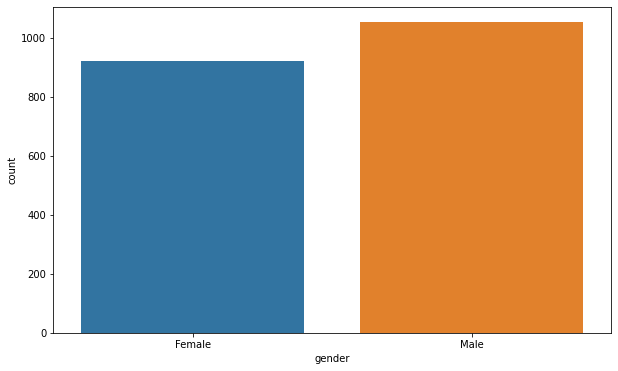

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot("gender",data=df)

In [ ]:
df[['weekly_max_night_mins','no_of_days_subscribed','churn']].groupby('churn').mean()

,weekly_max_night_mins,no_of_days_subscribed
churn,,
0.0,100.406342,99.711098
1.0,100.763359,100.007634


In [ ]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
df['gender'].value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

# Dealing with Categorical data as Machine Learning model does not work on string data type

In [ ]:
df.replace({'multi_screen':{'no':0,'yes':1}},inplace=True)
df.replace({'mail_subscribed':{'no':0,'yes':1}},inplace=True)
df.replace({'gender':{'Female':0,'Male':1}},inplace=True)


In [ ]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0.0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0.0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0.0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0.0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,0.0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [ ]:
df.describe()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,1976.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,0.532895,38.69050,99.750000,0.099000,0.285000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.499043,10.20641,39.755386,0.298737,0.451527,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,0.000000,18.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.00000,73.000000,0.000000,0.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,1.000000,37.00000,99.000000,0.000000,0.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,1.000000,44.00000,127.000000,0.000000,1.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,1.000000,82.00000,243.000000,1.000000,1.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


This shows how distibution of churn in Male and Female

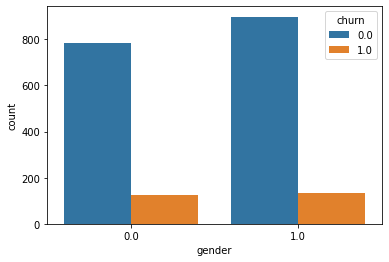

In [ ]:
# Here Female is 0 and male is 1
sns.countplot('gender',hue='churn',data=df)

This shows how many person churn and not churn who had been maximum days inactive

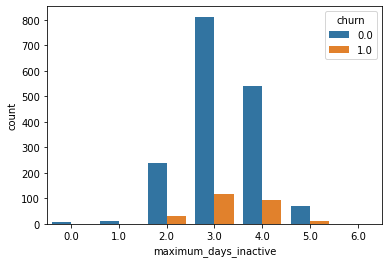

In [ ]:
sns.countplot('maximum_days_inactive',hue='churn',data=df)

# Dealing with missing values

In [ ]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [ ]:
df['churn'].fillna(df['churn'].mode()[0],inplace=True)

In [ ]:
df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].mode()[0],inplace=True)

In [ ]:
X=df.drop('churn',axis=1) #features, independent variables
y=df['churn'] # dependent variable,target

# Handling imbalanced data using oversampling

This countplot shows how data is highly imbalanced

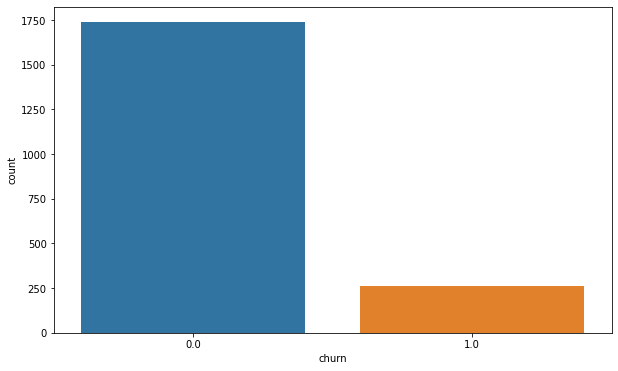

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot("churn",data=df)

In [ ]:
percentage=100*df['churn'].value_counts()/len(df['churn'])

In [ ]:
percentage

0.0    86.9
1.0    13.1
Name: churn, dtype: float64

In [ ]:
le=LabelEncoder()
df['multi_screen']=le.fit_transform(df['multi_screen'])

In [ ]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [ ]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0


Handling imbalanced data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()


0.0    1738
1.0    1738
Name: churn, dtype: int64

# Data Visualization

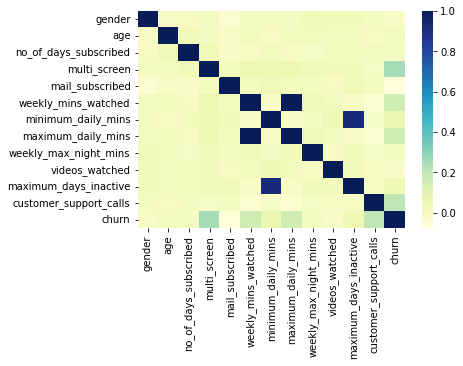

In [ ]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

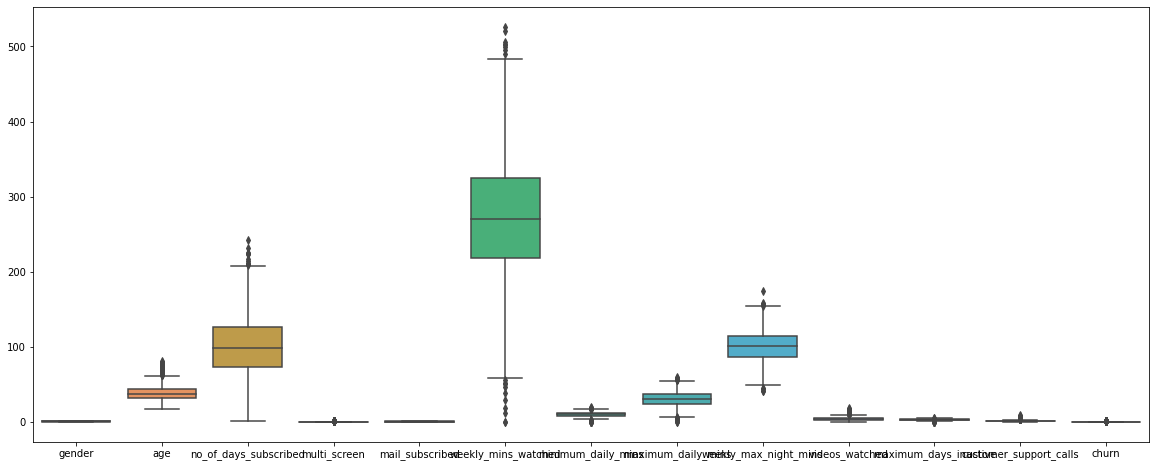

In [ ]:
#outlier detection

plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

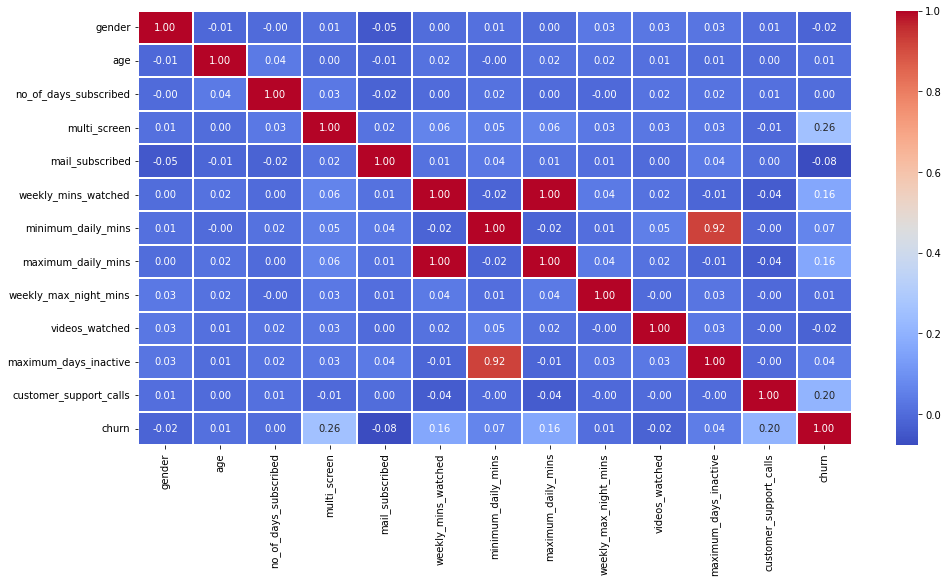

In [ ]:
 #Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")
plt.show()

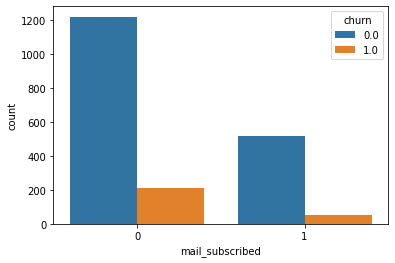

In [ ]:
sns.countplot('mail_subscribed',hue='churn',data=df)

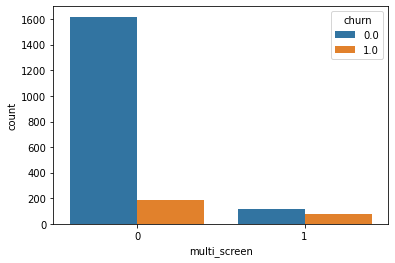

In [ ]:
sns.countplot('multi_screen',hue='churn',data=df)

# Splitting the dataset into the trainig set and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   int64  
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   int64  
 4   mail_subscribed         2000 non-null   int64  
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   2000 non-null   float64
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   2000 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 203.2 KB


# Feature Scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=lr.predict(X_test)

Accuracy on train data

In [ ]:
y_pred_train=lr.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.7097122302158273

Accuracy on test data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7183908045977011

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

0.6735751295336787

In [ ]:
recall_score(y_test,y_pred1)

0.7878787878787878

In [ ]:
f1_score(y_test,y_pred1)

0.7262569832402234

Confusion Matrix

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[240, 126],
       [ 70, 260]])

Cross validation

In [ ]:
from sklearn.model_selection import cross_validate
cv=cross_validate(lr,X,y,scoring="accuracy",cv=10)
cv['test_score']

array([0.885, 0.895, 0.86 , 0.885, 0.87 , 0.88 , 0.85 , 0.855, 0.865,
       0.87 ])

# Support Vector Classification

In [ ]:
from sklearn import svm


In [ ]:
svm=svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2=svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8577586206896551

In [ ]:
precision_score(y_test,y_pred2)

0.8290598290598291

# KNN Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.853448275862069

In [ ]:
precision_score(y_test,y_pred3)

0.7923076923076923

# Decision Tree Classifier



In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.8721264367816092

In [ ]:
precision_score(y_test,y_pred4)

0.8356545961002786

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.9367816091954023

In [ ]:
precision_score(y_test,y_pred5)

0.9333333333333333

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.718391
1,SVC,0.857759
2,KNN,0.853448
3,DT,0.872126
4,RF,0.936782


Visualization of all models we used to find best one

In [ ]:
import seaborn as sns

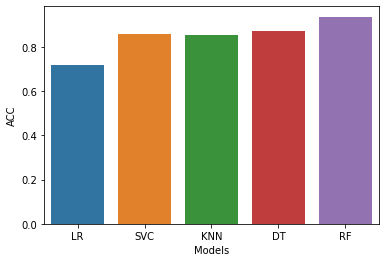

In [ ]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [ ]:
final_data2=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF'],
                         'ACC':[precision_score(y_test,y_pred1),
                                precision_score(y_test,y_pred2),
                                precision_score(y_test,y_pred3),
                                precision_score(y_test,y_pred4),
                                precision_score(y_test,y_pred5)]})

As random forest has higher Precision score and accuracy score, so this model is fit for our data

In [ ]:
final_data2

,Models,ACC
0,LR,0.673575
1,SVC,0.829060
2,KNN,0.792308
3,DT,0.835655
4,RF,0.933333


# Conclusion and Save the best model

 We will used Random Forest Classifier, it gives us high accuracy score and high precision score among all the model.

In [ ]:
X_res=sc.fit_transform(X_res)

In [ ]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [ ]:
model=joblib.load('churn_predict_model')